<a href="https://colab.research.google.com/github/Chandana-0430/cv/blob/main/sentimental_analysis_of_restaurant_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

# Load your dataset in TSV format (replace 'your_dataset.tsv' with the actual file path)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Restaurant_Reviews.tsv', delimiter ='\t',quoting = 3)
# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Preprocess the 'Review' column and create a new column 'Processed_Review'
data['Processed_Review'] = data['Review'].apply(preprocess_text)

# Features (preprocessed reviews)
X = data['Processed_Review']

# Target variable (binary labels: 1 for Liked, 0 for not Liked)
y = data['Liked']

# CountVectorizer
count_vectorizer = CountVectorizer(max_features=1000)  # You can adjust max_features as needed
X_count = count_vectorizer.fit_transform(X)

# Multinomial Naive Bayes Classifier
nb_classifier = MultinomialNB(alpha=0.5)  # Use the best alpha value you found

# Train the classifier on the entire dataset
nb_classifier.fit(X_count, y)




Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


MultinomialNB(alpha=0.5)

In [6]:
# Initialize Stratified K-fold cross-validation
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

best_accuracy = 0
best_alpha = None

for alpha in [0.1, 0.5, 1.0, 2.0]:  # Hyperparameter values to tune
    accuracy_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # CountVectorizer
        count_vectorizer = CountVectorizer(max_features=1000)  # You can adjust max_features as needed
        X_train_count = count_vectorizer.fit_transform(X_train)
        X_test_count = count_vectorizer.transform(X_test)

        # Multinomial Naive Bayes Classifier
        nb_classifier = MultinomialNB(alpha=alpha)
        nb_classifier.fit(X_train_count, y_train)

        # Predictions
        y_pred = nb_classifier.predict(X_test_count)

        # Calculate accuracy for this fold
        fold_accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(fold_accuracy)

In [7]:
# Calculate the mean accuracy across folds for this alpha value
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

    # Check if this alpha gives better accuracy
if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_alpha = alpha

# Train the final classifier with the best alpha value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
count_vectorizer = CountVectorizer(max_features=1000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)
best_nb_classifier = MultinomialNB(alpha=best_alpha)
best_nb_classifier.fit(X_train_count, y_train)

# Predictions
y_pred = best_nb_classifier.predict(X_test_count)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print("Best Alpha:", best_alpha)
print("Accuracy:", accuracy * 100, "%")
print("Precision:", precision*100, "%")
print("Recall:", recall*100, "%")


Best Alpha: 2.0
Accuracy: 77.0 %
Precision: 79.59183673469387 %
Recall: 75.0 %


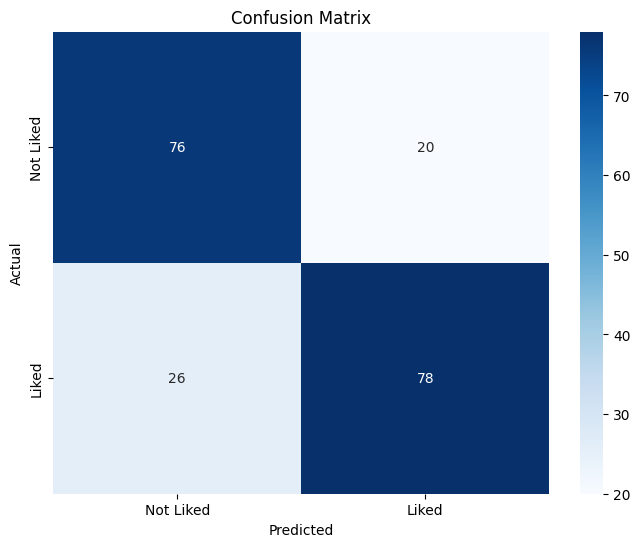

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

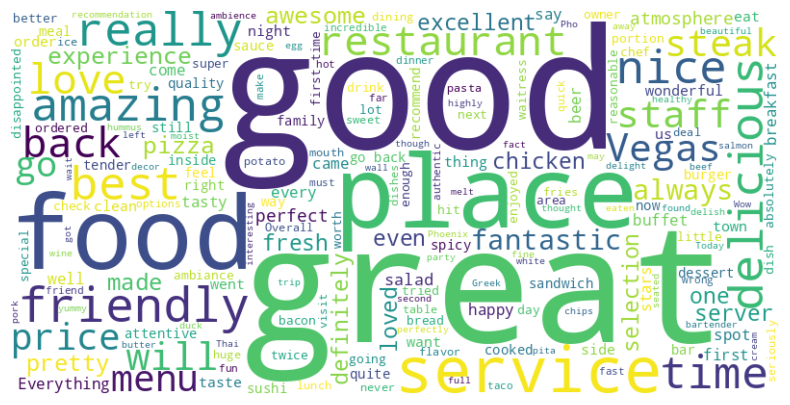

In [12]:
# import library
# positive review

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = data.loc[data['Liked'] == 1,:]
text = ' '.join([text for text in word_cloud['Review']])
# Generate a WordCloud object
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
# Function to predict whether a review is liked or not
def predict_review(input_review):
    # Preprocess the input review
    preprocessed_review = preprocess_text(input_review)

    # Transform the preprocessed review using CountVectorizer
    input_review_count = count_vectorizer.transform([preprocessed_review])

    # Make the prediction
    prediction = nb_classifier.predict(input_review_count)

    if prediction[0] == 1:
        return "Liked"
    else:
        return "Not Liked"

# Example usage:
input_review = input("Enter a restaurant review: ")
result = predict_review(input_review)
print("Predicted Sentiment:", result)

Enter a restaurant review: the is not bad
Predicted Sentiment: Liked
